1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [26]:
import pandas as pd
df = pd.read_csv('fatal-police-shootings-data.csv')
df.rename(columns = {'state':'USPS'},inplace = True)
df


,id,name,date,manner_of_death,armed,age,gender,race,city,USPS,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [27]:
import numpy as np
illness_data=df.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc='count')
illness_data

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


3.Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

Odp: Największy odsetek oznak choroby psychicznej wskazywała rasa "W"

In [28]:
illness_data['percent_of_mental_illness']=(illness_data[True]/illness_data.sum(axis=1)).round(2)
illness_data.sort_values(by='percent_of_mental_illness',ascending=False)

signs_of_mental_illness,False,True,percent_of_mental_illness
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

<AxesSubplot: xlabel='Day', ylabel='Interventions'>

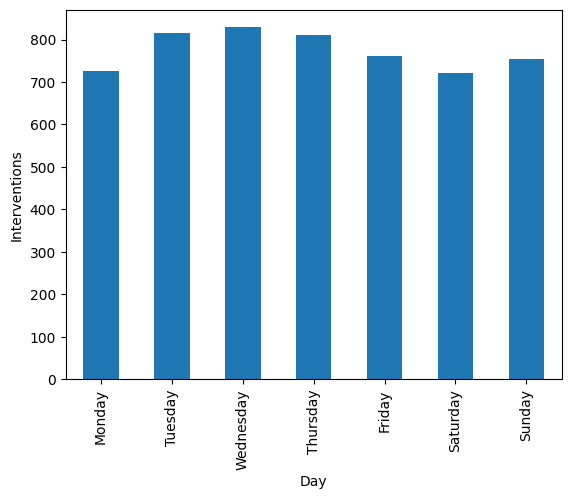

In [29]:
df['date'] = pd.to_datetime(df['date'])
df['day']=df['date'].dt.day_name()
count_days=df['day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
count_days.plot(kind='bar',xlabel='Day',ylabel='Interventions')

5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [30]:
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
population = data[0][:52][['State','Census population, April 1, 2020 [1][2]']]
population.rename(columns={'Census population, April 1, 2020 [1][2]':'population'},inplace = True)
population.head()

,State,population
0,California,39538223
1,Texas,29145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [31]:
data=pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations',header=2)
shortcuts=data[0][9:60][['ISO','Unnamed: 5']]
shortcuts.rename(columns = {'ISO':'State', 'Unnamed: 5':'USPS'},inplace = True)
shortcuts.head()

,State,USPS
9,Alabama,AL
10,Alaska,AK
11,Arizona,AZ
12,Arkansas,AR
13,California,CA


In [32]:
df_states=df.set_index('USPS').join(shortcuts.set_index('USPS')).reset_index()
df_states.head()

,USPS,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,day,State
0,AK,131,John Martin Whittaker,2015-02-08,shot,gun,33.0,M,W,Anchorage,False,attack,Car,False,Sunday,Alaska
1,AK,836,Tristan Vent,2015-09-08,shot,gun,19.0,M,N,Fairbanks,False,attack,Not fleeing,False,Tuesday,Alaska
2,AK,816,Vincent J. Perdue,2015-09-09,shot,gun,33.0,M,N,Fairbanks,False,attack,Car,False,Wednesday,Alaska
3,AK,953,Jon Ployhar,2015-10-24,shot,undetermined,49.0,M,W,Kenai Peninsula,False,attack,Not fleeing,False,Saturday,Alaska
4,AK,1166,Herman Bean,2016-01-12,shot,knife,49.0,M,N,Spenard,True,other,Not fleeing,False,Tuesday,Alaska


In [33]:
incidents=df_states.groupby('State').count().reset_index()[['State','id']]
incidents.rename(columns = {'id':'num of incidents'},inplace = True)
incidents.head()

,State,num of incidents
0,Alabama,104
1,Alaska,39
2,Arizona,254
3,Arkansas,83
4,California,799


In [34]:
incidents_population_state=incidents.set_index('State').join(population.set_index('State'))
incidents_population_state['incident per 1000 inhabitants']=(incidents_population_state['num of incidents']*1000/incidents_population_state['population']).round(4)
incidents_population_state.head()

,num of incidents,population,incident per 1000 inhabitants
State,,,
Alabama,104,5024279,0.0207
Alaska,39,733391,0.0532
Arizona,254,7151502,0.0355
Arkansas,83,3011524,0.0276
California,799,39538223,0.0202
